In [14]:
!pip install chardet

In [15]:

import numpy as np
import pandas as pd
import chardet
with open('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', 'rb') as file:
    data = file.read(100000)
    result = chardet.detect(data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")


Detected encoding: ISO-8859-1


In [16]:
data=pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")
data.head()



,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [25]:
df=df.drop(['Soundcloud Streams','TIDAL Popularity'], axis =1)

In [34]:
print(df['Artist'].nunique())
print(df['Artist'].value_counts())

1999
Artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64


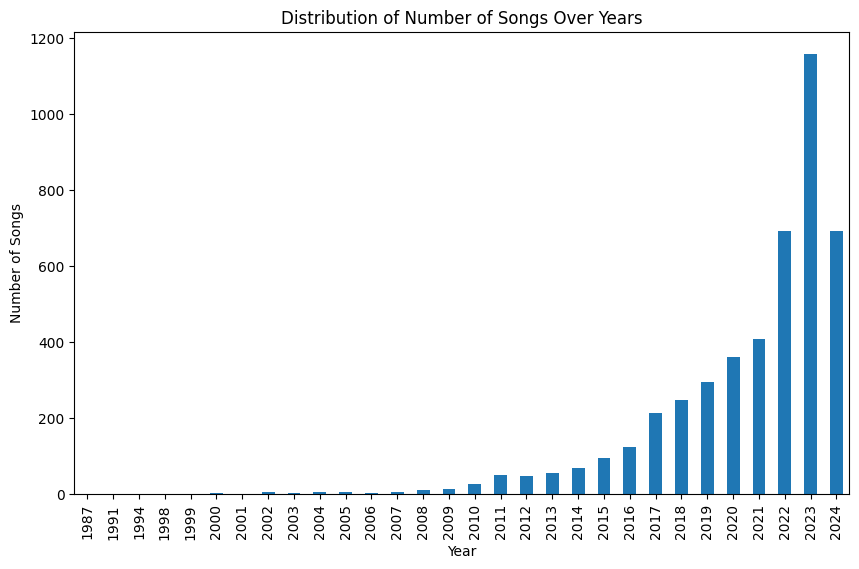

In [31]:
import matplotlib.pyplot as plt
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release Date'].dt.year
year_distribution = df['year'].value_counts().sort_index()
year_distribution.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Distribution of Number of Songs Over Years')
plt.show()


In [51]:
for x in df.columns[6:]:
    df[x] = pd.to_numeric(df[x])


In [52]:
df = df.map(lambda x: x.replace(',','') if isinstance(x,str) else x)
df['Spotify Streams'].fillna(0)

0       3.904709e+08
1       3.237039e+08
2       6.013093e+08
3       2.031281e+09
4       1.070349e+08
            ...     
4595    3.050500e+08
4596    5.228236e+07
4597    1.899727e+08
4598    1.454670e+08
4599    2.557407e+08
Name: Spotify Streams, Length: 4600, dtype: float64

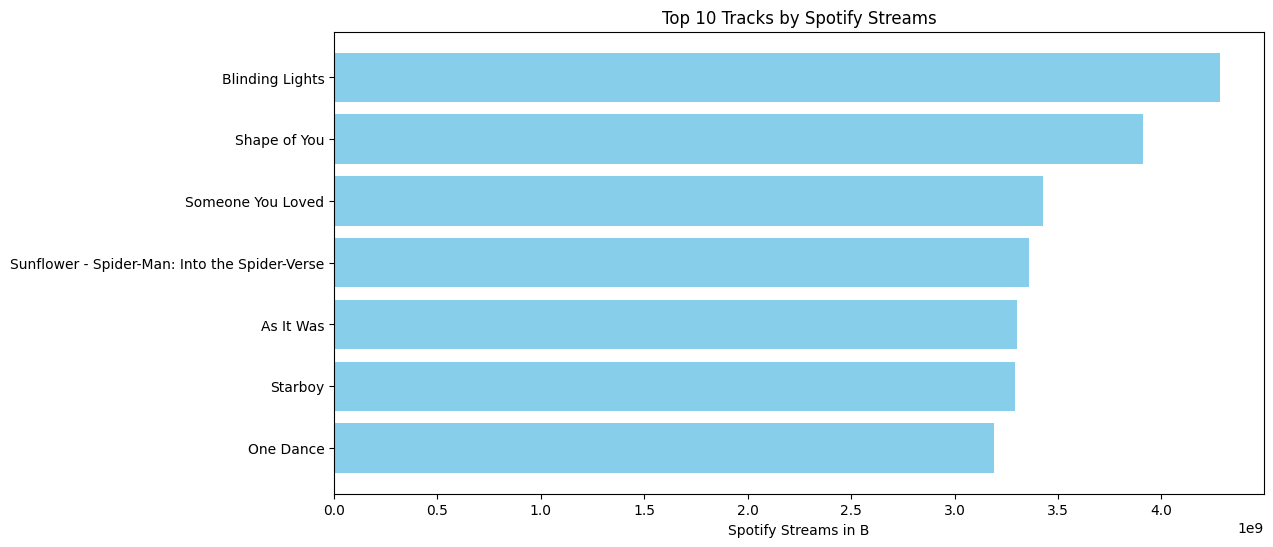

In [58]:
top_tracks = df.sort_values(by='Spotify Streams', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_tracks['Track'], top_tracks['Spotify Streams'], color='skyblue')
plt.xlabel('Spotify Streams in B')
plt.title('Top 10 Tracks by Spotify Streams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest streams on top
plt.show()


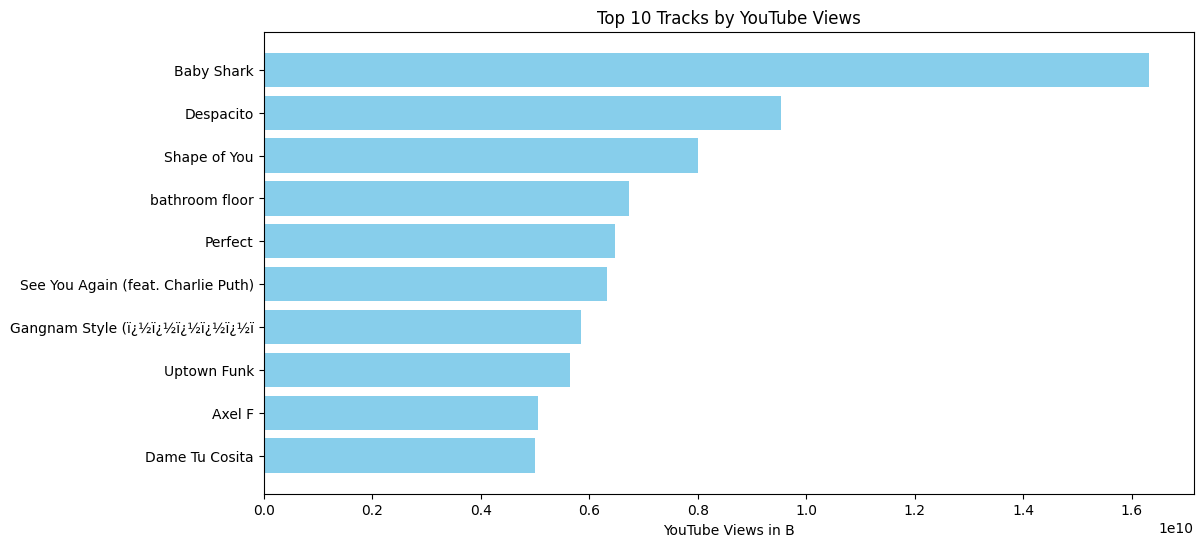

In [59]:
top_tracks = df.sort_values(by='YouTube Views', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_tracks['Track'], top_tracks['YouTube Views'], color='skyblue')
plt.xlabel('YouTube Views in B')
plt.title('Top 10 Tracks by YouTube Views')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest streams on top
plt.show()


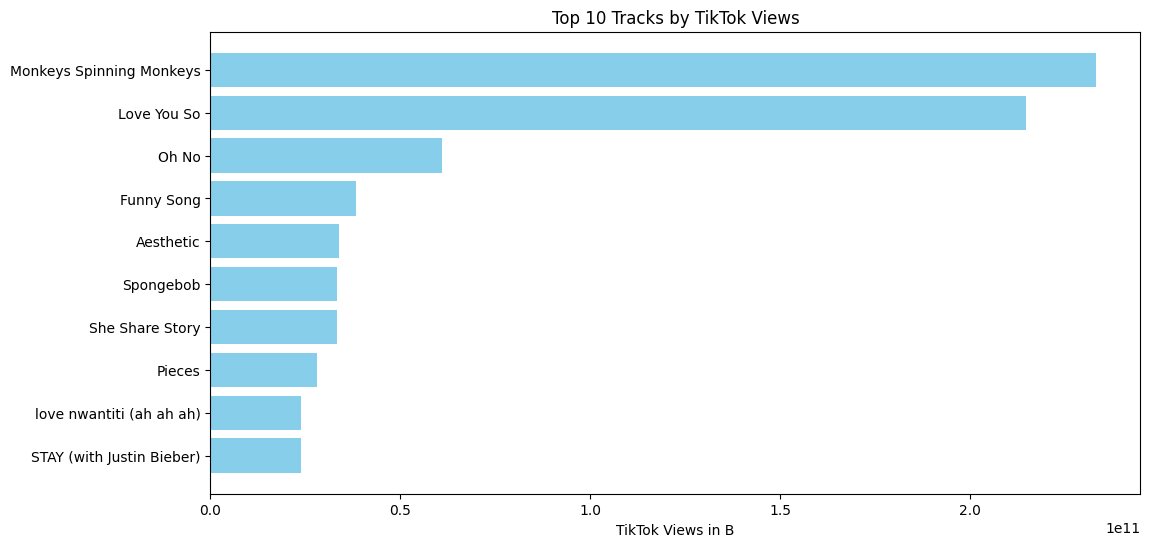

In [60]:
top_tracks = df.sort_values(by='TikTok Views', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_tracks['Track'], top_tracks['TikTok Views'], color='skyblue')
plt.xlabel('TikTok Views in B')
plt.title('Top 10 Tracks by TikTok Views')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest streams on top
plt.show()


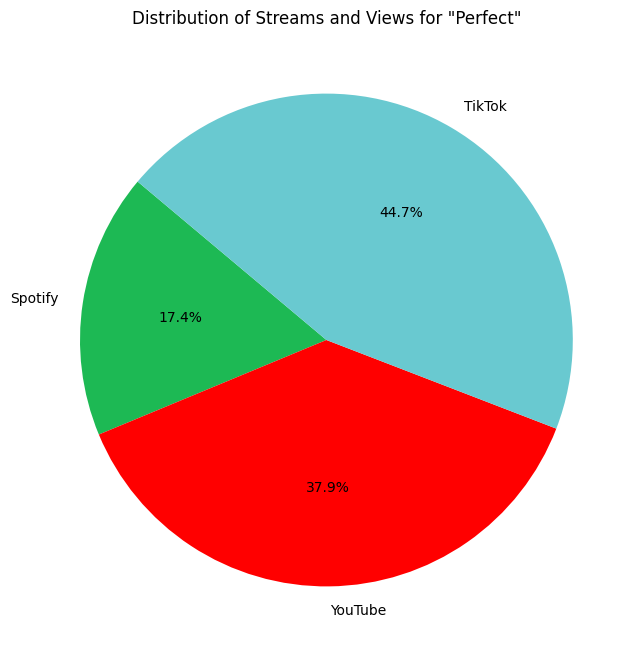

In [74]:
shape_of_you = df[df['Track'] == 'Perfect']
values = shape_of_you[['Spotify Streams', 'YouTube Views', 'TikTok Views']].values.flatten()
labels = ['Spotify', 'YouTube', 'TikTok']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#1DB954', '#FF0000', '#69C9D0'], startangle=140)
plt.title('Distribution of Streams and Views for "Perfect"')
plt.show()


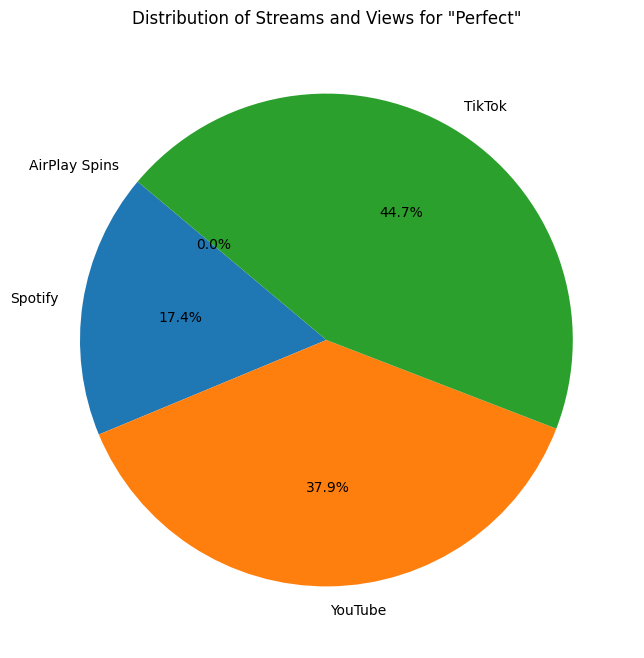

In [100]:
shape_of_you = df[df['Track'] == 'Perfect']
values = shape_of_you[['Spotify Streams', 'YouTube Views', 'TikTok Views','AirPlay Spins',]].values.flatten()
labels = ['Spotify', 'YouTube', 'TikTok','AirPlay Spins',]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Streams and Views for "Perfect"')
plt.show()


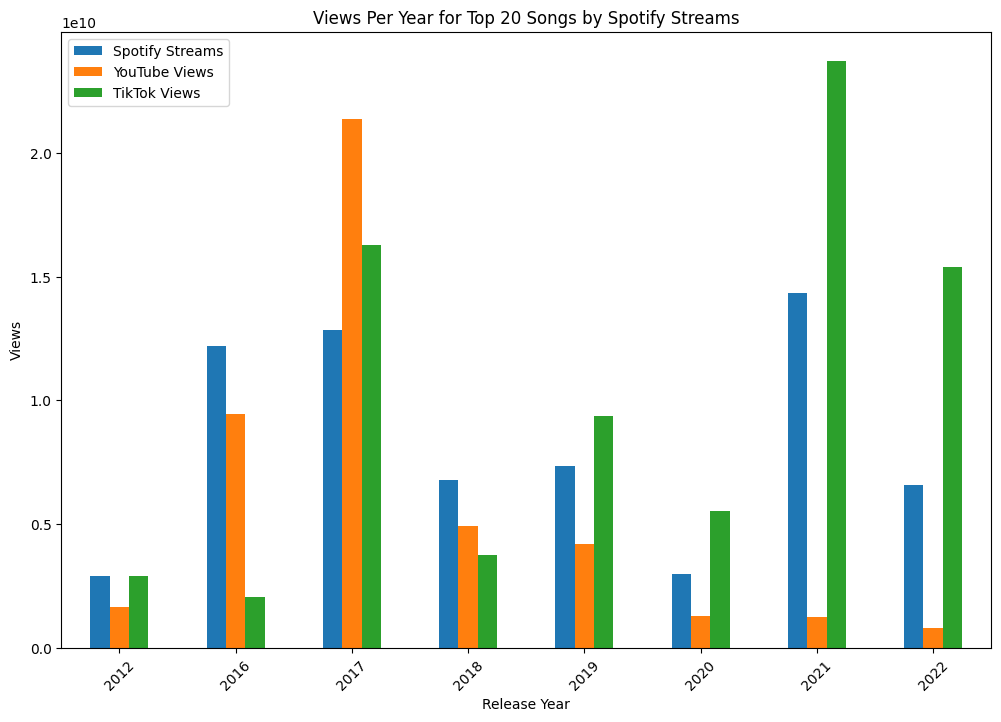

In [90]:
top_10_songs = df.nlargest(20, 'Spotify Streams')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release Date'].dt.year

views_per_year = top_10_songs.groupby('year')[['Spotify Streams', 'YouTube Views', 'TikTok Views']].sum()

views_per_year.plot(kind='bar', figsize=(12, 8))
plt.title('Views Per Year for Top 20 Songs by Spotify Streams')
plt.xlabel('Release Year')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


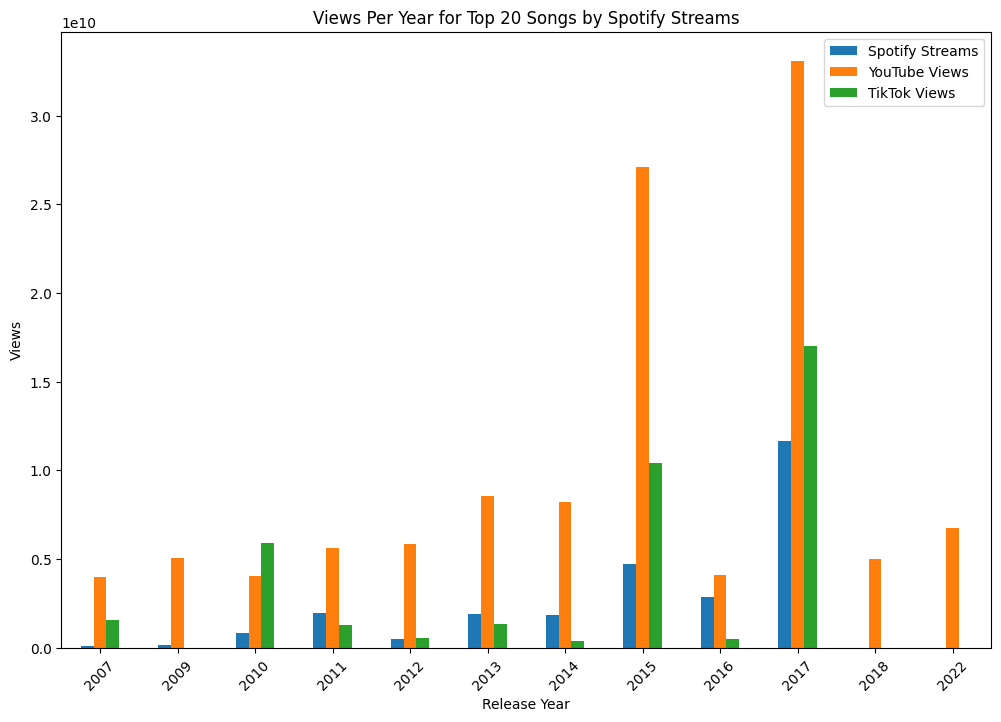

In [86]:
top_10_songs = df.nlargest(20, 'YouTube Views')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release Date'].dt.year

views_per_year = top_10_songs.groupby('year')[['Spotify Streams', 'YouTube Views', 'TikTok Views']].sum()

views_per_year.plot(kind='bar', figsize=(12, 8))
plt.title('Views Per Year for Top 20 Songs by Spotify Streams')
plt.xlabel('Release Year')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


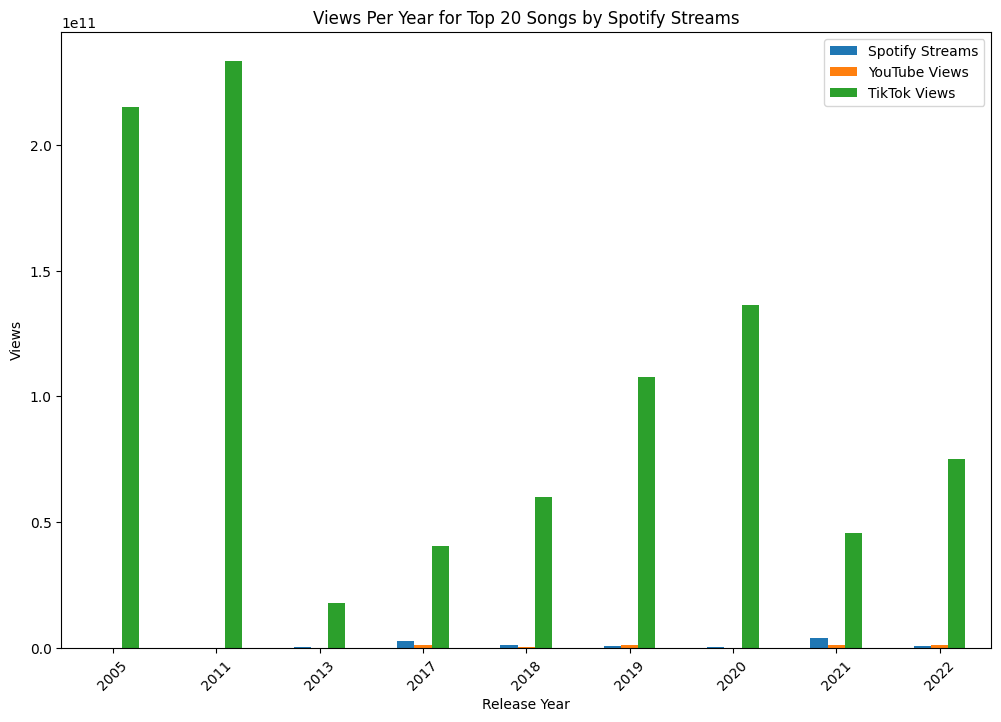

In [87]:
top_10_songs = df.nlargest(20, 'TikTok Views')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['year'] = df['Release Date'].dt.year

views_per_year = top_10_songs.groupby('year')[['Spotify Streams', 'YouTube Views', 'TikTok Views']].sum()

views_per_year.plot(kind='bar', figsize=(12, 8))
plt.title('Views Per Year for Top 20 Songs by Spotify Streams')
plt.xlabel('Release Year')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()
